## Import Libraries

In [1]:
# Lib & Dependencies
import pandas as pd
import numpy as np
import xgboost as xgb
import scipy

import seaborn as sns
import matplotlib.pyplot as plt

import requests
import gc

import crunchdao

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Download data

In [2]:
client = crunchdao.Client(apikey="")
# Chose a file format between parquet and csv 
file_format = 'parquet'

# Download current dataset
client.download_data(directory=".", file_format=file_format)

['./X_train.parquet',
 './y_train.parquet',
 './X_test.parquet',
 './example_submission.parquet']

In [3]:
if file_format == 'parquet':
  # Data for training
  train_features = pd.read_parquet(f'./X_train.{file_format}')
  # Data for which you will submit your prediction
  test_data = pd.read_parquet(f'./X_test.{file_format}')
  # Targets use for your supervised training
  train_targets = pd.read_parquet(f'./y_train.{file_format}')
  # Exemple of an awaited submission
  example_submission = pd.read_parquet(f'./example_submission.{file_format}')
elif file_format == 'csv':
  # Data for training
  train_features = pd.read_csv(f'./X_train.{file_format}')
  # Data for which you will submit your prediction
  test_data = pd.read_csv(f'./X_test.{file_format}')
  # Targets use for your supervised training
  train_targets = pd.read_csv(f'./y_train.{file_format}')
  # Exemple of an awaited submission
  example_submission = pd.read_csv(f'./example_submission.{file_format}')

In [4]:
# Merge train_features and train_targets for ease of use
train_data = pd.merge(train_features, train_targets, on=['id', 'Moons'], how='inner')

del train_features, train_targets
gc.collect()

0

In [5]:
# Get the features columns name and the targets columns name
features = [col for col in train_data.columns if 'Feature' in col]
targets = [col for col in train_data.columns if 'target' in col]

In [25]:
# Lib & Dependencies
import pandas as pd
import numpy as np
import scipy

import seaborn as sns
import matplotlib.pyplot as plt

import requests
import gc

import crunchdao
from sklearn.decomposition import PCA

## Download Data

In [8]:
client = crunchdao.Client(apikey="") # <= Your API key here
# Get the configuration of the current dataset
client.dataset_config()

{'round': {'id': 148,
  'number': 2,
  'absoluteNumber': 123,
  'start': '2023-04-28 16:00:00',
  'end': '2023-05-04 09:00:00',
  'batch': {'id': 48,
   'number': 30,
   'absoluteNumber': 32,
   'start': '2023-04-23',
   'end': '2023-05-17',
   'hackathon': False,
   'open': True,
   'over': False},
  'dataset': {'id': 11,
   'name': 'master',
   'description': 'all in one',
   'hidden': False,
   'leaderboardDisabled': False},
  'updated': True,
  'periods': {'white': 'P8D', 'red': 'P30D', 'green': 'P60D', 'blue': 'P90D'},
  'inception': '2023-04-27',
  'forcedStart': None,
  'moonsDuration': 'P7D',
  'negativePrevented': False,
  'published': True,
  'threadPoolSize': 4,
  'minimumDaysForUsableTarget': 5,
  'universeFile': 'hash_table',
  'offset': 'P0D',
  'benchmark': '^RUI',
  'columnSuffix': '',
  'metric': 'SPEARMAN',
  'targetType': 'ALPHA_V5',
  'open': False,
  'scoringStart': '2023-05-04',
  'batchId': 48,
  'datasetId': 11,
  'over': True},
 'live': True,
 'start': '2023-05

In [9]:
# Chose a file format between parquet and csv 
file_format = 'parquet'

# Download current dataset
client.download_data(directory=".", file_format=file_format)

['./X_train.parquet',
 './y_train.parquet',
 './X_test.parquet',
 './example_submission.parquet']

In [10]:
if file_format == 'parquet':
  # Data for training
  train_features = pd.read_parquet(f'./X_train.{file_format}')
  # Data for which you will submit your prediction
  test_data = pd.read_parquet(f'./X_test.{file_format}')
  # Targets use for your supervised training
  train_targets = pd.read_parquet(f'./y_train.{file_format}')
  # Exemple of an awaited submission
  example_submission = pd.read_parquet(f'./example_submission.{file_format}')
elif file_format == 'csv':
  # Data for training
  train_features = pd.read_csv(f'./X_train.{file_format}')
  # Data for which you will submit your prediction
  test_data = pd.read_csv(f'./X_test.{file_format}')
  # Targets use for your supervised training
  train_targets = pd.read_csv(f'./y_train.{file_format}')
  # Exemple of an awaited submission
  example_submission = pd.read_csv(f'./example_submission.{file_format}')

In [11]:
# Merge train_features and train_targets for ease of use
train_data = pd.merge(train_features, train_targets, on=['id', 'Moons'], how='inner')

del train_features, train_targets
gc.collect()

190

In [12]:
# Get the features columns name and the targets columns name
features = [col for col in train_data.columns if 'Feature' in col]
targets = [col for col in train_data.columns if 'target' in col]

# EDA

In [13]:
train_data.head()

,id,Moons,wrythm_Feature_1,wrythm_Feature_2,wrythm_Feature_3,wrythm_Feature_4,wrythm_Feature_5,wrythm_Feature_6,wrythm_Feature_7,wrythm_Feature_8,...,3b1-signal_Feature_46,3b1-signal_Feature_47,3b1-signal_Feature_48,3b1-signal_Feature_49,3b1-signal_Feature_50,3b1-signal_Feature_51,target_w,target_r,target_g,target_b
0,58950,0,0.83,0.33,0.33,0.67,0.33,0.00,0.33,0.33,...,0.33,0.67,0.33,0.50,0.83,0.17,0.50,0.33,0.50,0.33
1,72918,0,0.17,0.50,0.50,0.17,0.67,0.50,0.50,0.50,...,0.50,0.33,0.00,0.00,0.67,0.67,0.67,0.33,0.50,0.67
2,99888,0,0.00,0.67,0.33,0.83,0.67,0.00,1.00,0.33,...,0.00,0.50,0.33,0.50,0.67,0.67,0.67,0.67,0.67,0.83
3,205230,0,0.00,0.67,0.50,0.67,0.67,0.50,0.50,0.67,...,0.50,0.50,0.67,0.83,0.17,0.83,0.33,0.50,0.67,0.50
4,121182,0,0.17,0.33,0.17,0.50,1.00,0.33,0.67,0.50,...,0.17,0.67,0.67,0.17,0.33,0.67,0.33,0.17,0.33,0.33


In [14]:
train_data.tail()

,id,Moons,wrythm_Feature_1,wrythm_Feature_2,wrythm_Feature_3,wrythm_Feature_4,wrythm_Feature_5,wrythm_Feature_6,wrythm_Feature_7,wrythm_Feature_8,...,3b1-signal_Feature_46,3b1-signal_Feature_47,3b1-signal_Feature_48,3b1-signal_Feature_49,3b1-signal_Feature_50,3b1-signal_Feature_51,target_w,target_r,target_g,target_b
310898,175178,361,0.67,0.67,0.17,0.17,0.83,0.17,1.00,0.33,...,0.50,0.67,0.17,0.67,0.00,0.50,0.67,0.33,0.50,0.33
310899,314901,361,0.83,0.33,0.50,0.17,0.33,0.50,0.50,0.17,...,0.50,0.17,0.83,0.67,0.33,0.33,0.33,0.67,0.50,0.50
310900,16889,361,0.83,0.50,0.33,0.50,0.33,0.17,0.67,0.33,...,0.50,0.17,0.50,0.17,0.33,0.33,0.67,0.50,0.50,0.67
310901,147704,361,0.33,0.17,0.83,0.33,0.67,0.50,0.17,0.50,...,0.67,0.67,0.33,0.67,0.83,0.33,0.50,0.17,0.33,0.50
310902,200640,361,0.33,0.67,0.17,0.33,1.00,0.17,0.83,0.50,...,1.00,0.83,1.00,0.33,0.00,0.67,0.50,0.50,0.50,0.67


In [15]:
train_data.describe()

,id,Moons,wrythm_Feature_1,wrythm_Feature_2,wrythm_Feature_3,wrythm_Feature_4,wrythm_Feature_5,wrythm_Feature_6,wrythm_Feature_7,wrythm_Feature_8,...,3b1-signal_Feature_46,3b1-signal_Feature_47,3b1-signal_Feature_48,3b1-signal_Feature_49,3b1-signal_Feature_50,3b1-signal_Feature_51,target_w,target_r,target_g,target_b
count,310903.0,310903.000000,310903.00000,310903.00000,310903.00000,310903.00000,310903.00000,310903.00000,310903.00000,310903.00000,...,310903.00000,310903.00000,310903.00000,310903.00000,310903.00000,310903.00000,310903.000000,310903.000000,310903.000000,310903.000000
mean,161186.107844,178.565591,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,...,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.500000,0.500001,0.500000,0.500001
std,93036.861722,104.357604,0.23252,0.23252,0.23252,0.23252,0.23252,0.23252,0.23252,0.23252,...,0.23252,0.23252,0.23252,0.23252,0.23252,0.23252,0.130339,0.175581,0.146296,0.185074
min,0.0,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,80645.5,88.000000,0.33000,0.33000,0.33000,0.33000,0.33000,0.33000,0.33000,0.33000,...,0.33000,0.33000,0.33000,0.33000,0.33000,0.33000,0.500000,0.330000,0.500000,0.330000
50%,161134.0,177.000000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,...,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.500000,0.500000,0.500000,0.500000
75%,241750.5,269.000000,0.67000,0.67000,0.67000,0.67000,0.67000,0.67000,0.67000,0.67000,...,0.67000,0.67000,0.67000,0.67000,0.67000,0.67000,0.500000,0.670000,0.500000,0.670000
max,322334.0,361.000000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000


In [16]:
test_data.head()

,id,Moons,wrythm_Feature_1,wrythm_Feature_2,wrythm_Feature_3,wrythm_Feature_4,wrythm_Feature_5,wrythm_Feature_6,wrythm_Feature_7,wrythm_Feature_8,...,3b1-signal_Feature_42,3b1-signal_Feature_43,3b1-signal_Feature_44,3b1-signal_Feature_45,3b1-signal_Feature_46,3b1-signal_Feature_47,3b1-signal_Feature_48,3b1-signal_Feature_49,3b1-signal_Feature_50,3b1-signal_Feature_51
0,244649,362,0.67,0.33,1.00,0.67,0.67,0.83,0.33,0.50,...,0.17,0.50,0.33,0.67,0.33,1.00,0.33,0.33,1.00,0.33
1,126506,362,0.67,0.33,1.00,0.83,0.33,0.33,0.17,0.67,...,0.00,0.67,0.83,0.67,0.50,0.83,0.33,0.50,0.83,0.33
2,87368,362,0.67,0.67,0.67,0.83,0.83,0.67,0.83,0.83,...,0.50,0.33,0.17,0.50,0.33,0.33,0.67,0.17,0.33,0.50
3,185658,362,0.50,0.17,0.67,0.50,0.50,0.17,0.83,0.50,...,0.50,0.17,0.33,0.33,0.67,0.50,0.83,0.17,0.33,0.33
4,215543,362,0.17,1.00,0.17,0.00,0.50,0.17,1.00,0.33,...,0.50,0.50,0.50,0.33,0.50,0.50,1.00,0.83,0.50,0.83


### Number of stocks overtime

<Axes: xlabel='Moons'>

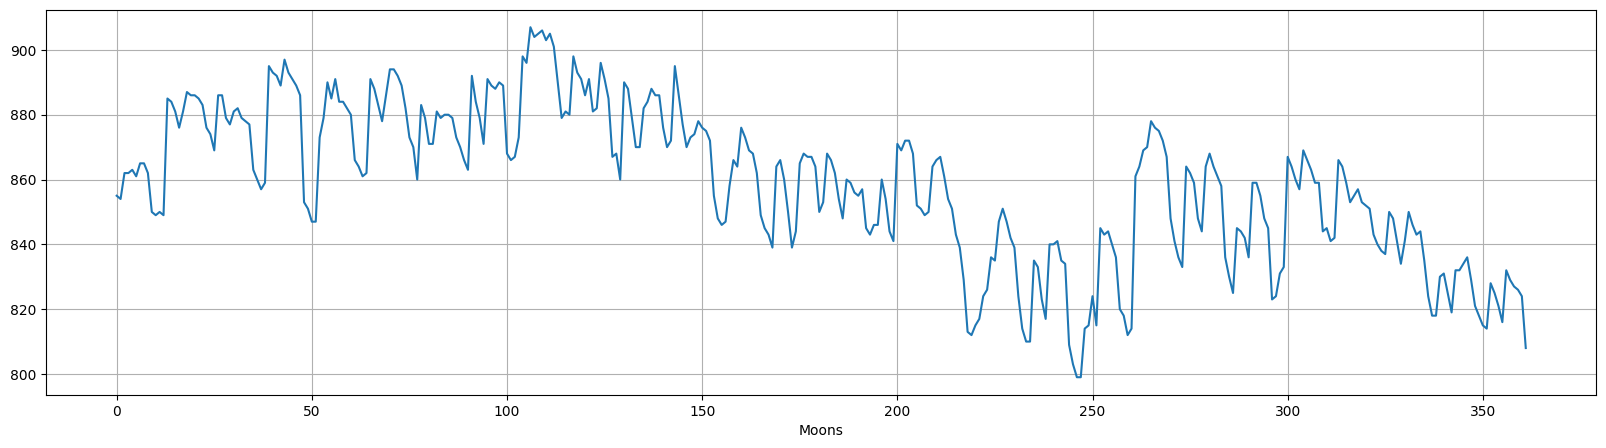

In [17]:
# Show the number of stocks in each moon 
train_data.groupby('Moons', group_keys=False).id.count().plot(figsize=(20, 5), grid='on')

We start looking at the reference statistics of features and targets.

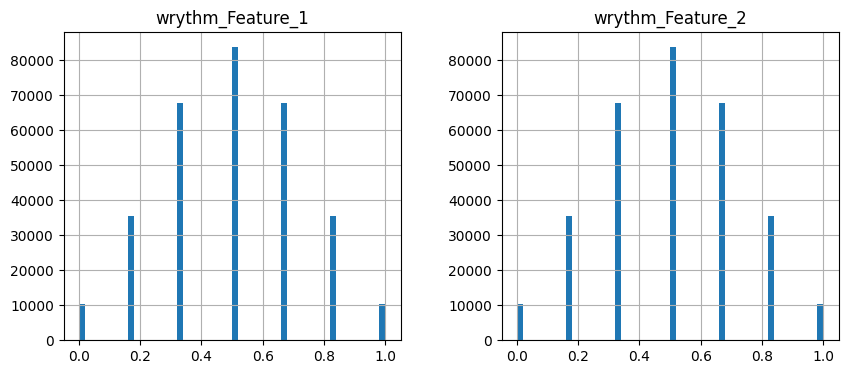

In [18]:
# Train data binning explained and plot
hist = train_data[features].iloc[:, :2].hist(bins=50, figsize=(10,4))

Each feature X is a normalized and quantized Gaussian, leading to a multivariate quantized Gaussian Process.

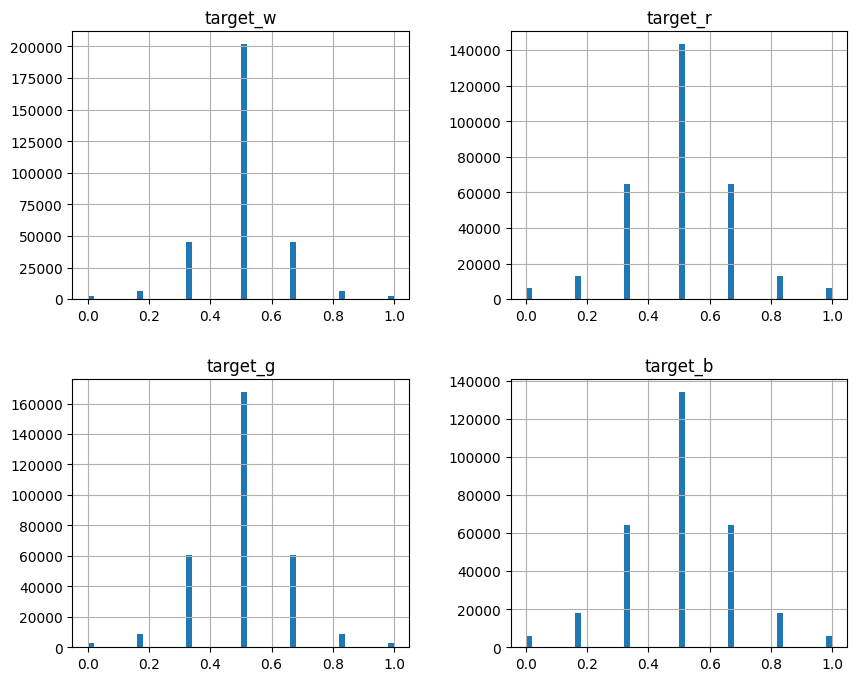

In [19]:
# Target explained and plot
hist = train_data[targets].hist(bins=50, figsize=(10,8))

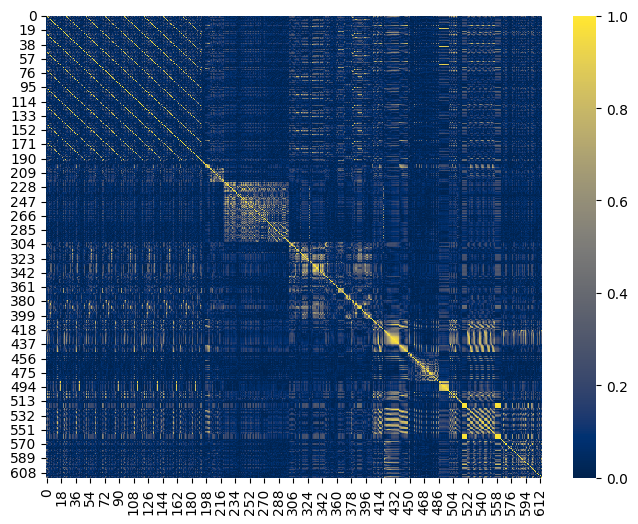

In [20]:
def show_cov(x):
    cov = x.corr().abs().to_numpy()
    plt.figure(figsize=(8, 6))
    sns.heatmap(cov,vmin=0, vmax=1, cmap="cividis")
    plt.show()

# Show last moon covariance matrix
train_data_last = train_data.loc[train_data['Moons'] == train_data['Moons'].max(), features]
show_cov(train_data_last)

Each target y is a normalized and quantized T-Student. 

The Xy(t) matrix is associated with a [StudentTProcess](https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/StudentTProcess).

## Feature Covariance Norm

In [47]:
X = train_data[['Moons'] + features]

In [59]:
def frob_cov(x):
    cov = x.iloc[:, 1:].corr()
    return np.linalg.norm(cov)

In [60]:
frob_norm = X.groupby('Moons').apply(lambda x: frob_cov(x))

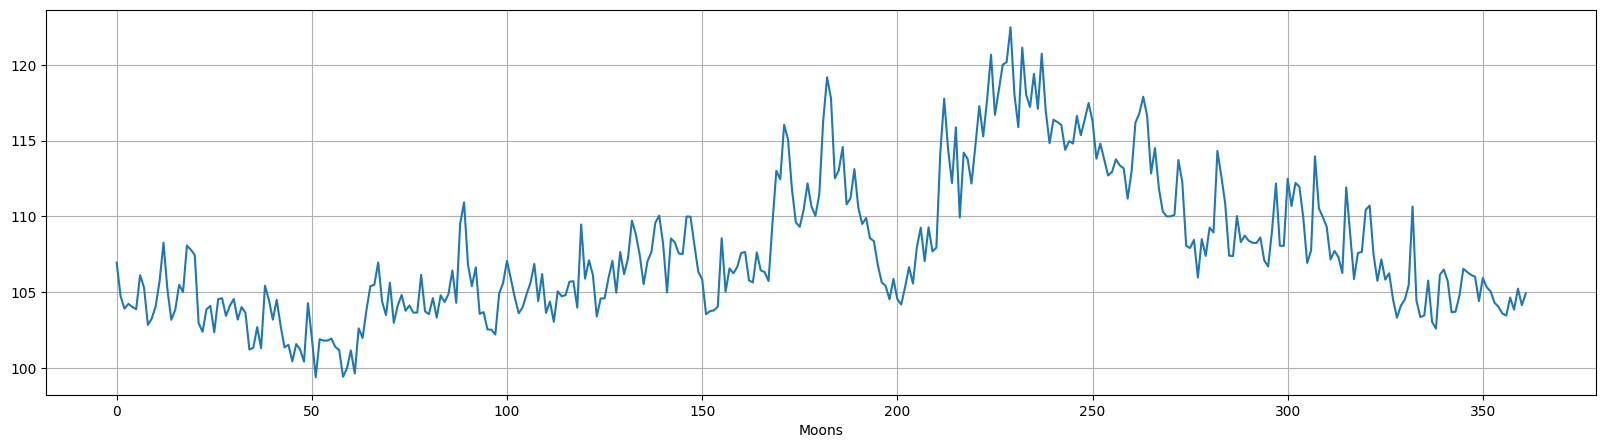

In [64]:
plt.figure(figsize=(20, 5))
frob_norm.plot()
plt.grid()

---

### Credits

Created by: [Jeremy Berros](https://github.com/jberros)

Greatly inspired by the work from: [Jon Taylor](https://github.com/jonrtaylor)

Updated by: [Matteo Manzi](https://github.com/matteoettam09)